##**Homesite Quote Conversion**

**Which customers will purchase a quoted insurance plan?**

In [43]:
from google.colab import drive
drive.mount('/gdrive')
#Change current working directory to gdrive
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [44]:
!pip install vecstack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
from vecstack import stacking
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score #works
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE 
from sklearn.svm import SVC
from collections import Counter #for Smote, 

import warnings
warnings.filterwarnings("ignore")

In [46]:
trainfile = r'/gdrive/My Drive/CIS508/IA3/RevisedHomesiteTrain1.csv'
train_data = pd.read_csv(trainfile)

testfile = r'/gdrive/My Drive/CIS508/IA3/RevisedHomesiteTest1.csv'
test_data = pd.read_csv(testfile)

print(train_data.shape)
print(test_data.shape)
print(train_data.head())  

(65000, 596)
(173836, 596)
   CoverageField11A  CoverageField11B  CoverageField1A  CoverageField1B  \
0                 2                 1               17               23   
1                 5                 9                6                8   
2                 4                 6                7               12   
3                15                23                3                2   
4                 4                 6                8               13   

   CoverageField2A  CoverageField2B  CoverageField3A  CoverageField3B  \
0               17               23               15               22   
1                6                8                5                7   
2                7               12                6               10   
3                3                2                2                2   
4                8               13                7               11   

   CoverageField4A  CoverageField4B  ...  PropertyField38_N  \
0               16  

In [47]:
Y1 = train_data['QuoteConversion_Flag']

In [48]:
#Class Distribution
Y1.value_counts()

0    52738
1    12262
Name: QuoteConversion_Flag, dtype: int64

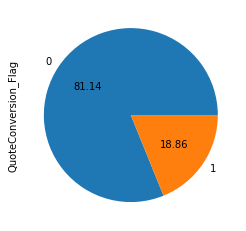

In [49]:
Y1.value_counts().plot.pie(autopct='%.2f')

In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65000 entries, 0 to 64999
Columns: 596 entries, CoverageField11A to QuoteConversion_Flag
dtypes: float64(5), int64(591)
memory usage: 295.6 MB


In [51]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173836 entries, 0 to 173835
Columns: 596 entries, CoverageField11A to GeographicField64
dtypes: float64(5), int64(590), object(1)
memory usage: 790.5+ MB


In [11]:
train_data.isnull().sum().sort_values(ascending=False)

CoverageField11A        0
PersonalField17_YU      0
PersonalField17_YW      0
PersonalField17_YX      0
PersonalField17_YY      0
                       ..
PersonalField64         0
PersonalField65         0
PersonalField66         0
PersonalField67         0
QuoteConversion_Flag    0
Length: 596, dtype: int64

In [12]:
train_data.describe()

,CoverageField11A,CoverageField11B,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,...,PropertyField38_N,PropertyField38_Y,GeographicField63_,GeographicField63_N,GeographicField63_Y,GeographicField64_CA,GeographicField64_IL,GeographicField64_NJ,GeographicField64_TX,QuoteConversion_Flag
count,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,...,65000.000000,65000.000000,65000.0,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000
mean,7.798892,12.954892,9.014585,12.995831,9.060000,13.017308,9.064538,13.017877,8.973785,13.011031,...,0.974969,0.020292,0.0,0.976262,0.023738,0.361862,0.120908,0.267631,0.249600,0.188646
std,5.304856,7.259023,5.586114,7.217093,5.568791,7.207118,5.588694,7.212825,5.564675,7.203325,...,0.156220,0.140999,0.0,0.152234,0.152234,0.480543,0.326022,0.442727,0.432785,0.391230
min,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,7.000000,5.000000,7.000000,5.000000,7.000000,5.000000,7.000000,5.000000,7.000000,...,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,13.000000,8.000000,13.000000,8.000000,13.000000,8.000000,13.000000,8.000000,13.000000,...,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,19.000000,12.000000,19.000000,12.000000,19.000000,12.000000,19.000000,12.000000,19.000000,...,1.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
TrainCols = list(train_data.columns.values)
TestCols = list(test_data.columns.values)
print("Train Data Columns")
print(TrainCols)
print()
print("Test Data Columns")
print(TestCols)

Train Data Columns
['CoverageField11A', 'CoverageField11B', 'CoverageField1A', 'CoverageField1B', 'CoverageField2A', 'CoverageField2B', 'CoverageField3A', 'CoverageField3B', 'CoverageField4A', 'CoverageField4B', 'CoverageField5A', 'CoverageField5B', 'CoverageField6A', 'CoverageField6B', 'Field10', 'Field11', 'Field7', 'Field8', 'Field9', 'GeographicField10A', 'GeographicField10B', 'GeographicField11A', 'GeographicField11B', 'GeographicField12A', 'GeographicField12B', 'GeographicField13A', 'GeographicField13B', 'GeographicField14A', 'GeographicField14B', 'GeographicField15A', 'GeographicField15B', 'GeographicField16A', 'GeographicField16B', 'GeographicField17A', 'GeographicField17B', 'GeographicField18A', 'GeographicField18B', 'GeographicField19A', 'GeographicField19B', 'GeographicField1A', 'GeographicField1B', 'GeographicField20A', 'GeographicField20B', 'GeographicField21A', 'GeographicField21B', 'GeographicField22A', 'GeographicField22B', 'GeographicField23A', 'GeographicField23B', 'G

In [54]:
# Error in encoding
test_data.drop(labels = ['GeographicField64_CA','GeographicField64_IL','GeographicField64_NJ','GeographicField64_TX'], axis =1, inplace =True)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)
Xcat = pd.DataFrame(ohe.fit_transform(test_data[['GeographicField64']]),columns=ohe.get_feature_names_out(),index=test_data.index)
test_data = pd.concat([test_data,Xcat],axis=1)
test_data.drop(['GeographicField64'],axis=1,inplace=True)
test_data.head()

,CoverageField11A,CoverageField11B,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,...,PropertyField37_Y,PropertyField38_N,PropertyField38_Y,GeographicField63_,GeographicField63_N,GeographicField63_Y,GeographicField64_CA,GeographicField64_IL,GeographicField64_NJ,GeographicField64_TX
0,13,22,4,4,4,4,3,3,3,4,...,1,1,0,0,0,1,0.0,1.0,0.0,0.0
1,4,5,8,14,8,14,7,12,8,13,...,0,1,0,0,1,0,0.0,0.0,1.0,0.0
2,3,3,11,18,11,18,10,16,10,18,...,0,1,0,0,1,0,0.0,0.0,1.0,0.0
3,5,9,14,22,15,22,13,20,22,25,...,0,1,0,0,1,0,0.0,0.0,0.0,1.0
4,12,21,4,5,4,5,4,4,4,5,...,0,1,0,0,1,0,1.0,0.0,0.0,0.0


In [55]:
X = train_data[TrainCols[0:len(TrainCols)-1]].copy()
Y = train_data[['QuoteConversion_Flag']].copy()
print(X.shape)
print(Y.shape)
X_Test = test_data.copy()
print(X_Test.shape)

(65000, 595)
(65000, 1)
(173836, 595)


In [34]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = .3)

In [65]:
#Decision Tree without SMOTE
clf = DecisionTreeClassifier(max_depth = 5)
dt = clf.fit(Xtrain, Ytrain)
clf_predict=clf.predict(Xtest)
clf_predict_proba=clf.predict_proba(Xtest)
clf_predict_proba=clf_predict_proba[:,1]
print("accuracy Score (training) for Decision Tree:{0:6f}".format(clf.score(Xtest,Ytest)))
print()
print("Confusion Matrix for Decision Tree")
print(confusion_matrix(Ytest,clf_predict))

accuracy Score (training) for Decision Tree:0.902974

Confusion Matrix for Decision Tree
[[15785    18]
 [ 1874  1823]]


In [66]:
#Kaggle Submission
submit = pd.DataFrame()
submit["QuoteNumber"]= X_Test["QuoteNumber"]
submit["QuoteConversion_Flag"]=dt.predict_proba(X_Test)[:,1]
submit.to_csv('/gdrive/My Drive/CIS508/IA3/dt_predictProba1.csv',index=False)
read = pd.read_csv('/gdrive/My Drive/CIS508/IA3/dt_predictProba1.csv')
read.head()

,QuoteNumber,QuoteConversion_Flag
0,3,0.000000
1,5,0.042989
2,7,0.042989
3,9,0.042989
4,10,0.042989


In [64]:
#KNN without SMOTE
neigh = KNeighborsClassifier()
neigh1=neigh.fit(Xtrain, Ytrain)
neigh_predict=neigh.predict(Xtest)
neigh_predict_proba= neigh.predict_proba(Xtest)
neigh_predict_proba=neigh_predict_proba[:,1]
print("accuracy Score (training) for KNN:{0:6f}".format(neigh.score(Xtest,Ytest)))
print()
print("Confusion Matrix for KNN")
print(confusion_matrix(Ytest,neigh_predict))


accuracy Score (training) for KNN:0.781897

Confusion Matrix for KNN
[[15018   785]
 [ 3468   229]]


In [67]:
#Kaggle Submission
submit = pd.DataFrame()
submit["QuoteNumber"]= X_Test["QuoteNumber"]
submit["QuoteConversion_Flag"]=neigh1.predict_proba(X_Test)[:,1]
submit.to_csv('/gdrive/My Drive/CIS508/IA3/KNN_predictProba1.csv',index=False)
read = pd.read_csv('/gdrive/My Drive/CIS508/IA3/KNN_predictProba1.csv')
read.head()


,QuoteNumber,QuoteConversion_Flag
0,3,0.4
1,5,0.2
2,7,0.6
3,9,0.2
4,10,0.2


In [68]:
#MLP without SMOTE
mlp = MLPClassifier()
mlp1 = mlp.fit(Xtrain, Ytrain)
mlp_predict=mlp.predict(Xtest)
mlp_predict_proba=mlp.predict_proba(Xtest)
mlp_predict_proba=mlp_predict_proba[:,1]
print("accuracy Score (training) for MLP:{0:6f}".format(mlp.score(Xtest,Ytest)))
print()
print("Confusion Matrix for MLP")
print(confusion_matrix(Ytest,mlp_predict))


accuracy Score (training) for MLP:0.832359

Confusion Matrix for MLP
[[13501  2302]
 [  967  2730]]


In [69]:
#Kaggle Submission
submit = pd.DataFrame()
submit["QuoteNumber"]= X_Test["QuoteNumber"]
submit["QuoteConversion_Flag"]=mlp1.predict_proba(X_Test)[:,1]
submit.to_csv('/gdrive/My Drive/CIS508/IA3/mlp_predictProba1.csv',index=False)
read = pd.read_csv('/gdrive/My Drive/CIS508/IA3/mlp_predictProba1.csv')
read.head()


,QuoteNumber,QuoteConversion_Flag
0,3,0.998917
1,5,0.000484
2,7,0.999422
3,9,0.030026
4,10,0.027657


In [71]:
# Random Forest without SMOTE

rfc = RandomForestClassifier()
rfc1 = rfc.fit(Xtrain, Ytrain)
rfc_predict=rfc.predict(Xtest)
rfc_predict_proba=rfc.predict_proba(Xtest)
rfc_predict_proba=rfc_predict_proba[:,1]
print("accuracy Score (training) for Random Forest:{0:6f}".format(rfc.score(Xtest,Ytest)))
print()
print("Confusion Matrix for Random Forest")
print(confusion_matrix(Ytest,rfc_predict))


accuracy Score (training) for Random Forest:0.902974

Confusion Matrix for Decision Tree
[[15581   222]
 [ 1670  2027]]


In [72]:
#Kaggle Submission
submit = pd.DataFrame()
submit["QuoteNumber"]= X_Test["QuoteNumber"]
submit["QuoteConversion_Flag"]=rfc1.predict_proba(X_Test)[:,1]
submit.to_csv('/gdrive/My Drive/CIS508/IA3/rfc_predictProba1.csv',index=False)
read = pd.read_csv('/gdrive/My Drive/CIS508/IA3/rfc_predictProba1.csv')
read.head()


,QuoteNumber,QuoteConversion_Flag
0,3,0.02
1,5,0.13
2,7,0.05
3,9,0.01
4,10,0.26


In [93]:
# Linear SVM without SMOTE
from sklearn.svm import LinearSVC 
linsvm = LinearSVC(max_iter=300) 
linsvm1 = linsvm.fit(Xtrain, Ytrain) 
linsvm_predict=linsvm.predict(Xtest) 
print("accuracy Score (training) for Linear SVM Classifier:{0:6f}".format(linsvm.score(Xtest,Ytest))) 
print("Confusion Matrix for Linear SVM Classifier:") 
print(confusion_matrix(Ytest,linsvm_predict))

accuracy Score (training) for Linear SVM Classifier:0.784103
Confusion Matrix for Linear SVM Classifier:
[[14793  1010]
 [ 3200   497]]


In [95]:
submit = pd.DataFrame()
submit["QuoteNumber"]= X_Test["QuoteNumber"]
submit["QuoteConversion_Flag"]=linsvm1.predict(X_Test)
submit.to_csv('/gdrive/My Drive/CIS508/IA3/LinearSVM_predictProba1.csv',index=False)
read = pd.read_csv('/gdrive/My Drive/CIS508/IA3/LinearSVM_predictProba1.csv')
read.head()


,QuoteNumber,QuoteConversion_Flag
0,3,1
1,5,0
2,7,1
3,9,0
4,10,0


(QuoteConversion_Flag
 0                       36935
 1                        8565
 dtype: int64, <matplotlib.axes._subplots.AxesSubplot at 0x7ff428eb4310>)

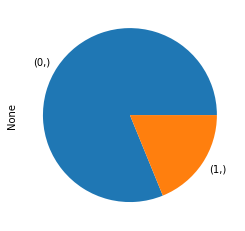

In [78]:
Ytrain.value_counts(),Ytrain.value_counts().plot.pie()

##**SMOTE**

In [80]:
# Smote 1

sm = SMOTE(sampling_strategy=1)
X_res, Y_res = sm.fit_resample(Xtrain, Ytrain)

(QuoteConversion_Flag
 0                       36935
 1                       36935
 dtype: int64, <matplotlib.axes._subplots.AxesSubplot at 0x7ff4296c6950>)

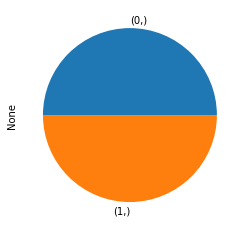

In [81]:
Y_res.value_counts(),Y_res.value_counts().plot.pie()

In [82]:
# Smote 2

sm1 = SMOTE(sampling_strategy=0.9)
X_res1, Y_res1 = sm1.fit_resample(Xtrain, Ytrain)

(QuoteConversion_Flag
 0                       36935
 1                       33241
 dtype: int64, <matplotlib.axes._subplots.AxesSubplot at 0x7ff42d8cb810>)

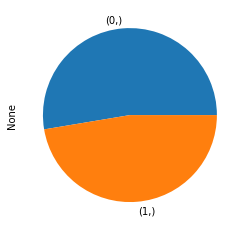

In [83]:
Y_res1.value_counts(),Y_res1.value_counts().plot.pie()

##**INITIALIZE CLASSIFIER**

In [100]:
#Model 1 with SMOTE 1
#Construct Decision Tree 
clf = DecisionTreeClassifier()
dt = clf.fit(X_res,Y_res)
clf_predict=clf.predict(Xtest)
clf_predict_proba=clf.predict_proba(Xtest)
clf_predict_proba=clf_predict_proba[:,1]
print("accuracy Score (training) for Decision Tree:{0:6f}".format(clf.score(Xtest,Ytest)))
print()
print("Confusion Matrix for Decision Tree")
print(confusion_matrix(Ytest,clf_predict))


accuracy Score (training) for Decision Tree:0.875231

Confusion Matrix for Decision Tree
[[14532  1271]
 [ 1162  2535]]


In [101]:
#Kaggle Submission
submit = pd.DataFrame()
submit["QuoteNumber"]= X_Test["QuoteNumber"]
submit["QuoteConversion_Flag"]=dt.predict_proba(X_Test)[:,1]
submit.to_csv('/gdrive/My Drive/CIS508/IA3/dt_sm1.csv',index=False)
read = pd.read_csv('/gdrive/My Drive/CIS508/IA3/dt_sm1.csv')
read.head()


,QuoteNumber,QuoteConversion_Flag
0,3,0.0
1,5,0.0
2,7,0.0
3,9,0.0
4,10,1.0


In [102]:
#Model 1 with SMOTE 2
#Construct Decision Tree  
clf = DecisionTreeClassifier()
dt = clf.fit(X_res1,Y_res1)
clf_predict=clf.predict(Xtest)
clf_predict_proba=clf.predict_proba(Xtest)
clf_predict_proba=clf_predict_proba[:,1]
print("accuracy Score (training) for Decision Tree:{0:6f}".format(clf.score(Xtest,Ytest)))
print()
print("Confusion Matrix for Decision Tree")
print(confusion_matrix(Ytest,clf_predict))


accuracy Score (training) for Decision Tree:0.876359

Confusion Matrix for Decision Tree
[[14542  1261]
 [ 1150  2547]]


In [103]:
#Kaggle Submission
submit = pd.DataFrame()
submit["QuoteNumber"]= X_Test["QuoteNumber"]
submit["QuoteConversion_Flag"]=dt.predict_proba(X_Test)[:,1]
submit.to_csv('/gdrive/My Drive/CIS508/IA3/dt_sm2.csv',index=False)
read = pd.read_csv('/gdrive/My Drive/CIS508/IA3/dt_sm2.csv')
read.head()


,QuoteNumber,QuoteConversion_Flag
0,3,0.0
1,5,0.0
2,7,0.0
3,9,0.0
4,10,0.0


In [104]:
#Model 2 with SMOTE 1
#Construct Random Forest Model
rfc = RandomForestClassifier()
rfc1 = rfc.fit(X_res,Y_res)
rfc_predict=rfc.predict(Xtest)
rfc_predict_proba=rfc.predict_proba(Xtest)
rfc_predict_proba=rfc_predict_proba[:,1]
print("accuracy Score (training) for Random Forest:{0:6f}".format(rfc.score(Xtest,Ytest)))
print()
print("Confusion Matrix for Random Forest")
print(confusion_matrix(Ytest,rfc_predict))

accuracy Score (training) for Random Forest:0.898308

Confusion Matrix for Random Forest
[[15246   557]
 [ 1426  2271]]


In [105]:
#Kaggle Submission
submit = pd.DataFrame()
submit["QuoteNumber"]= X_Test["QuoteNumber"]
submit["QuoteConversion_Flag"]=rfc1.predict_proba(X_Test)[:,1]
submit.to_csv('/gdrive/My Drive/CIS508/IA3/rfc_sm1.csv',index=False)
read = pd.read_csv('/gdrive/My Drive/CIS508/IA3/rfc_sm1.csv')
read.head()


,QuoteNumber,QuoteConversion_Flag
0,3,0.01
1,5,0.18
2,7,0.07
3,9,0.01
4,10,0.31


In [106]:
#Model 3 with SMOTE 1
#Construct MultiLayer Perceptron Model
mlp = MLPClassifier()
mlp1 = mlp.fit(X_res, Y_res)
mlp_predict=mlp.predict(Xtest)
mlp_predict_proba=mlp.predict_proba(Xtest)
mlp_predict_proba=mlp_predict_proba[:,1]
print("accuracy Score (training) for MLP:{0:6f}".format(mlp.score(Xtest,Ytest)))
print()
print("Confusion Matrix for MLP")
print(confusion_matrix(Ytest,mlp_predict))

accuracy Score (training) for MLP:0.707026

Confusion Matrix for MLP
[[10615  5188]
 [  525  3172]]


In [107]:
#Kaggle Submission
submit = pd.DataFrame()
submit["QuoteNumber"]= X_Test["QuoteNumber"]
submit["QuoteConversion_Flag"]=mlp1.predict_proba(X_Test)[:,1]
submit.to_csv('/gdrive/My Drive/CIS508/IA3/mlp_sm1.csv',index=False)
read = pd.read_csv('/gdrive/My Drive/CIS508/IA3/mlp_sm1.csv')
read.head()

,QuoteNumber,QuoteConversion_Flag
0,3,2.314864e-09
1,5,1.704185e-10
2,7,2.772824e-04
3,9,6.770485e-13
4,10,2.236985e-09


In [108]:
#Model 4 with SMOTE 1
#Construct KNN Model
neigh = KNeighborsClassifier()
neigh1 = neigh.fit(X_res, Y_res)
neigh_predict=neigh.predict(Xtest)
neigh_predict_proba= neigh.predict_proba(Xtest)
neigh_predict_proba=neigh_predict_proba[:,1]
print("accuracy Score (training) for KNN:{0:6f}".format(neigh.score(Xtest,Ytest)))
print()
print("Confusion Matrix for KNN")
print(confusion_matrix(Ytest,neigh_predict))

accuracy Score (training) for KNN:0.574256

Confusion Matrix for KNN
[[9602 6201]
 [2101 1596]]


In [109]:
#Kaggle Submission
submit = pd.DataFrame()
submit["QuoteNumber"]= X_Test["QuoteNumber"]
submit["QuoteConversion_Flag"]=neigh1.predict_proba(X_Test)[:,1]
submit.to_csv('/gdrive/My Drive/CIS508/IA3/knn_sm1.csv',index=False)
read = pd.read_csv('/gdrive/My Drive/CIS508/IA3/knn_sm1.csv')
read.head()

,QuoteNumber,QuoteConversion_Flag
0,3,0.6
1,5,0.8
2,7,0.6
3,9,0.2
4,10,0.4


In [110]:
#Model 5 with SMOTE 1
#Construct Linear Support Vector Machine Model
from sklearn.svm import LinearSVC 
linsvm = LinearSVC() 
linsvm1 = linsvm.fit(X_res, Y_res) 
linsvm_predict=linsvm.predict(Xtest) 
print("accuracy Score (training) for Linear SVM Classifier:{0:6f}".format(linsvm.score(Xtest,Ytest))) 
print("Confusion Matrix for Linear SVM Classifier:") 
print(confusion_matrix(Ytest,linsvm_predict))


accuracy Score (training) for Linear SVM Classifier:0.270359
Confusion Matrix for Linear SVM Classifier:
[[ 1648 14155]
 [   73  3624]]


In [111]:
#Kaggle Submission
submit = pd.DataFrame()
submit["QuoteNumber"]= X_Test["QuoteNumber"]
submit["QuoteConversion_Flag"]=linsvm1.predict(X_Test)
submit.to_csv('/gdrive/My Drive/CIS508/IA3/linearSVM_sm1.csv',index=False)
read = pd.read_csv('/gdrive/My Drive/CIS508/IA3/linearSVM_sm1.csv')
read.head()

,QuoteNumber,QuoteConversion_Flag
0,3,1
1,5,1
2,7,1
3,9,0
4,10,1


##**STACKING**

In [148]:
#STACKING
models = [ DecisionTreeClassifier(), RandomForestClassifier(),  MLPClassifier(), KNeighborsClassifier(), LinearSVC()]
S_Train, S_Test = stacking(models,                   
                           X_res, Y_res, X_Test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [DecisionTreeClassifier]
    fold  0:  [0.91650422]
    fold  1:  [0.92099848]
    fold  2:  [0.91649970]
    fold  3:  [0.92018195]
    ----
    MEAN:     [0.91854609] + [0.00206441]
    FULL:     [0.91854609]

model  1:     [RandomForestClassifier]
    fold  0:  [0.93881308]
    fold  1:  [0.93810916]
    fold  2:  [0.93815996]
    fold  3:  [0.93713110]
    ----
    MEAN:     [0.93805333] + [0.00060046]
    FULL:     [0.93805334]

model  2:     [MLPClassifier]
    fold  0:  [0.79867880]
    fold  1:  [0.77739874]
    fold  2:  [0.63031353]
    fold  3:  [0.54827530]
    ----
    MEAN:     [0.68866659] + [0.10379171]
    FULL:     [0.68866928]

model  3:     [KNeighborsClassifier]
    fold  0:  [0.71891921]
    fold  1:  [0.72200563]
    fold  2:  [0.71830833]
    fold  3:  [0.72047436]
    ----
    MEAN:     [0.71992688] + [0.00143667]
    FUL

In [149]:
print(S_Train.shape)
print(S_Test.shape)

(73870, 5)
(173836, 5)


##**STACKED MODELS WITH HYPERPARAMETER TUNING**

**1. DECISION TREE**

In [150]:
params = {'min_samples_leaf' : range(10,300,10),'max_depth': 
            range(5,30,2),'criterion':['gini','entropy']}
dt = DecisionTreeClassifier()
clf_rand = RandomizedSearchCV(dt,params)
clf_rand.fit(X_res, Y_res)
bestparams = clf_rand.best_params_
print(bestparams)
        

{'min_samples_leaf': 40, 'max_depth': 21, 'criterion': 'entropy'}


In [153]:
dt = DecisionTreeClassifier(**bestparams)
dt1=dt.fit(S_Train,Y_res)
dt_predict = dt.predict(S_Test)
dt_predict_proba=dt.predict_proba(S_Test)
dt_predict_proba=dt_predict_proba[:,1]

#Kaggle Submission
submit = pd.DataFrame()
submit["QuoteNumber"]= X_Test["QuoteNumber"]
submit["QuoteConversion_Flag"]=dt1.predict_proba(S_Test)[:,1]
submit.to_csv('/gdrive/My Drive/CIS508/IA3/dt_stacked.csv',index=False)
read = pd.read_csv('/gdrive/My Drive/CIS508/IA3/dt_stacked.csv')
read.head()





,QuoteNumber,QuoteConversion_Flag
0,3,0.048916
1,5,0.048916
2,7,0.048916
3,9,0.010373
4,10,0.010373


**2. RANDOM FOREST**

In [158]:
params = {'min_samples_leaf' : range(10,100,10),'max_depth': 
            range(1,10,2),'max_features':[1,20,10],'n_estimators':[20,30,40]}
rfc = RandomForestClassifier()
rfc_rand = RandomizedSearchCV(rfc,params)
rfc_rand.fit(S_Train,Y_res)
bestparams = rfc_rand.best_params_
print(bestparams)

{'n_estimators': 40, 'min_samples_leaf': 50, 'max_features': 1, 'max_depth': 3}


In [159]:
rfc = RandomForestClassifier(**bestparams)
rfc1=rfc.fit(S_Train,Y_res)
rfc_predict = rfc.predict(S_Test)
rfc_predict_proba=rfc.predict_proba(S_Test)
rfc_predict_proba=rfc_predict_proba[:,1]

#Kaggle Submission
submit = pd.DataFrame()
submit["QuoteNumber"]= X_Test["QuoteNumber"]
submit["QuoteConversion_Flag"]=rfc1.predict_proba(S_Test)[:,1]
submit.to_csv('/gdrive/My Drive/CIS508/IA3/rfc_stacked.csv',index=False)
read = pd.read_csv('/gdrive/My Drive/CIS508/IA3/rfc_stacked.csv')
read.head()

,QuoteNumber,QuoteConversion_Flag
0,3,0.089210
1,5,0.089210
2,7,0.089210
3,9,0.031169
4,10,0.031169
